# ***Práctica 3- Operaciones aritméticas y lógicas***

Las imágenes utilizadas en la práctica fueron obtenidas del dataset "Brain Tumor MRI dataset", encontrado en la plataforma Kaggle.

Link al dataset: https://www.kaggle.com/datasets/bilalakgz/brain-tumor-mri-dataset


In [ ]:
#Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Parte I- Operaciones aritméticas




 Suma ponderada

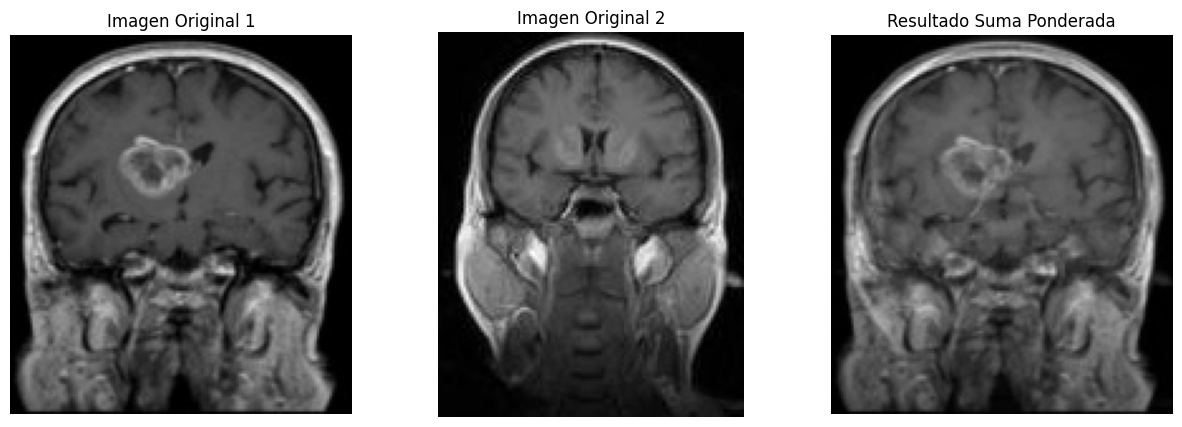

In [ ]:
# Cargar las dos imágenes
imagen2 = cv2.imread("/content/no tumor.jpg", cv2.IMREAD_GRAYSCALE)
imagen1 = cv2.imread("/content/tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar ambas imágenes al mismo tamaño si es necesario
imagen2_res = cv2.resize(imagen2, (imagen1.shape[1], imagen1.shape[0]))

# Aplicar la suma ponderada con pesos
alpha = 0.6 # Peso de la primera imagen
beta = 0.3   # Peso de la segunda imagen
gamma = 10     # Ajuste de brillo

imagen_resultado = cv2.addWeighted(imagen1, alpha, imagen2_res, beta, gamma)

# Mostrar imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap="gray")
plt.title("Imagen Original 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_resultado, cmap="gray")
plt.title("Resultado Suma Ponderada")
plt.axis("off")

plt.show()

Suma promedio

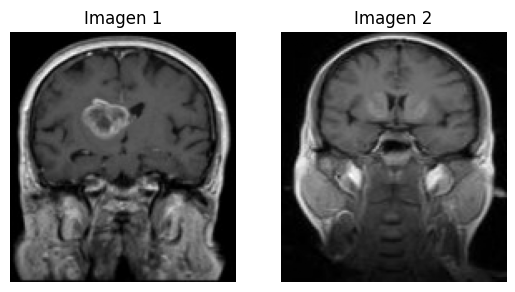

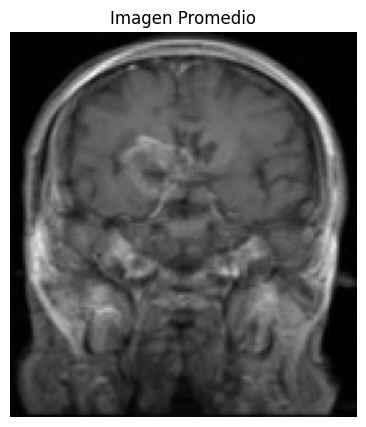

In [ ]:
# Cargar varias imágenes en una lista
imagenes = ["/content/tumor.jpg", "/content/no tumor.jpg"]
imagenes_cargadas = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in imagenes]

# Verificar que todas las imágenes tengan el mismo tamaño
alto, ancho = imagenes_cargadas[0].shape
imagenes_cargadas = [cv2.resize(img, (ancho, alto)) for img in imagenes_cargadas]

# Crear una imagen acumuladora en formato flotante
suma = np.zeros((alto, ancho), dtype=np.float32)

# Sumar todas las imágenes
for img in imagenes_cargadas:
    suma += img

# Calcular el promedio dividiendo por la cantidad de imágenes
imagen_promedio = suma / len(imagenes_cargadas)

# Convertir la imagen a formato uint8 para visualización
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)

# Mostrar imágenes originales
for i, img in enumerate(imagenes_cargadas):
    plt.subplot(1, len(imagenes), i+1)  # Crear subgráficos en una fila
    #plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray")  # Mostrar imagen
    plt.title(f"Imagen {i+1}")  # Título de cada imagen
    plt.axis("off")  # Ocultar ejes

plt.show()

#Mostrar imagen promedio
plt.figure(figsize=(5, 5))
#plt.subplot(1, 3, 1)
plt.imshow(imagen_promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis("off")
plt.show()

Resta de imágenes


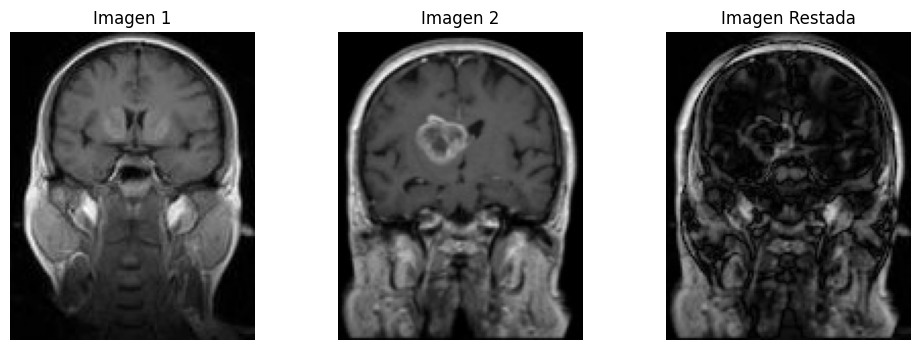

In [ ]:
# Cargar las dos imágenes
img1 = cv2.imread("/content/no tumor.jpg", cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises
img2 = cv2.imread("/content/tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Realizar la resta de imágenes
resta = cv2.absdiff(img2, img1)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Imagen Restada")
plt.axis("off")

plt.show()


*Multiplicación*

Multiplicación elemento por factores

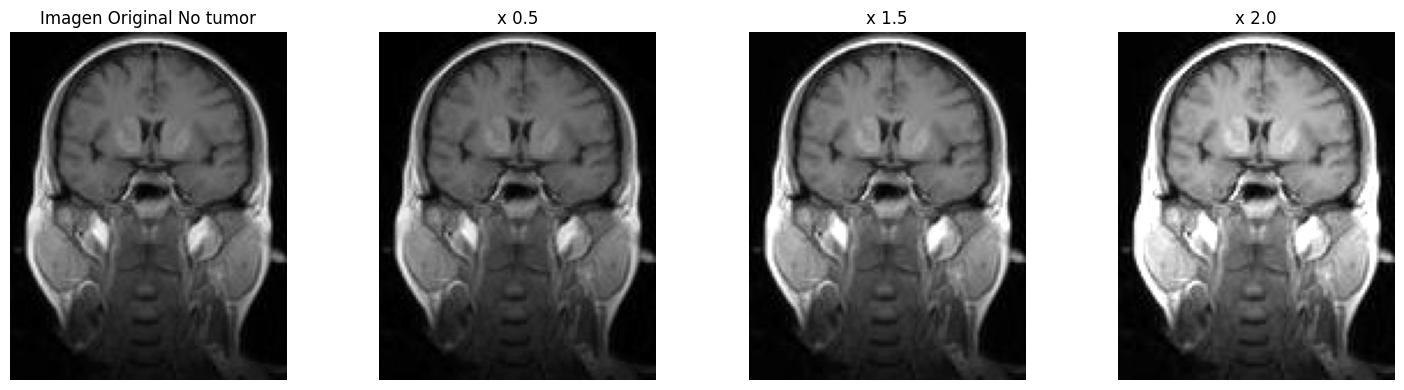

In [ ]:


# Cargar imagen en escala de grises
img = cv2.imread("/content/no tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Definir los factores de multiplicación
factores = [0.5, 1.5, 2.0]  # Menos brillo, más brillo, brillo fuerte

# Lista para guardar imágenes modificadas
imgs_multiplicadas = []

# Aplicar multiplicación para cada factor
for factor in factores:
    img_mul = cv2.multiply(img, np.array([factor], dtype=np.float32))
    img_mul = cv2.convertScaleAbs(img_mul)  # Convertir a uint8
    imgs_multiplicadas.append(img_mul)

# Mostrar la imagen original y las modificadas
plt.figure(figsize=(15, 4))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original No tumor")
plt.axis("off")

# Imágenes modificadas
for idx, (img_mod, factor) in enumerate(zip(imgs_multiplicadas, factores)):
    plt.subplot(1, 4, idx + 2)
    plt.imshow(img_mod, cmap='gray')
    plt.title(f"x {factor}")
    plt.axis("off")

plt.tight_layout()
plt.show()


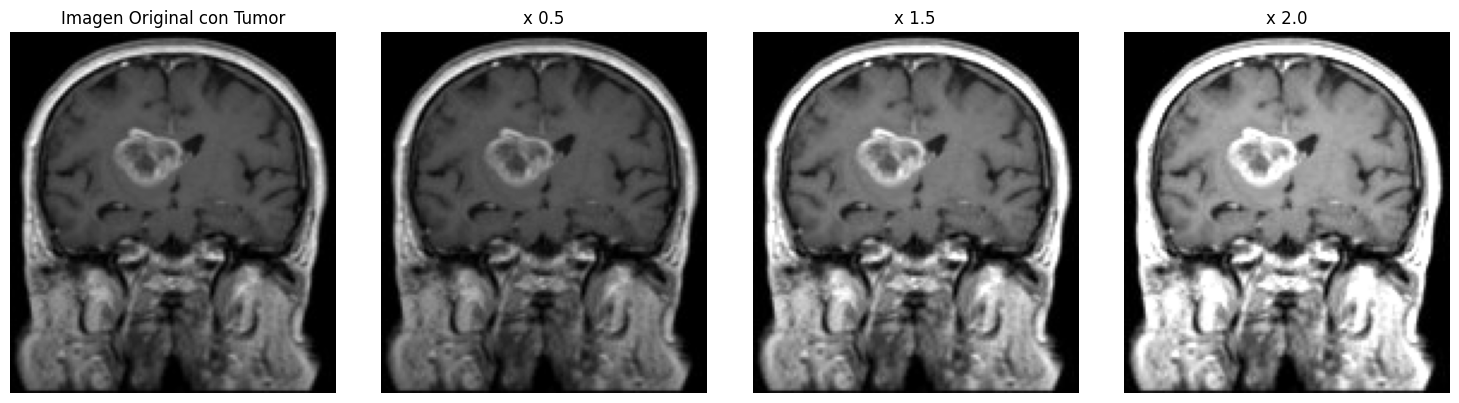

In [ ]:

# Cargar imagen en escala de grises
img = cv2.imread("/content/tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Definir los factores de multiplicación
factores = [0.5, 1.5, 2.0]  # Menos brillo, más brillo, brillo fuerte

# Lista para guardar imágenes modificadas
imgs_multiplicadas = []

# Aplicar multiplicación para cada factor
for factor in factores:
    img_mul = cv2.multiply(img, np.array([factor], dtype=np.float32))
    img_mul = cv2.convertScaleAbs(img_mul)  # Convertir a uint8
    imgs_multiplicadas.append(img_mul)

# Mostrar la imagen original y las modificadas
plt.figure(figsize=(15, 4))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original con Tumor")
plt.axis("off")

# Imágenes modificadas
for idx, (img_mod, factor) in enumerate(zip(imgs_multiplicadas, factores)):
    plt.subplot(1, 4, idx + 2)
    plt.imshow(img_mod, cmap='gray')
    plt.title(f"x {factor}")
    plt.axis("off")

plt.tight_layout()
plt.show()


multiplicación elemento por elemento


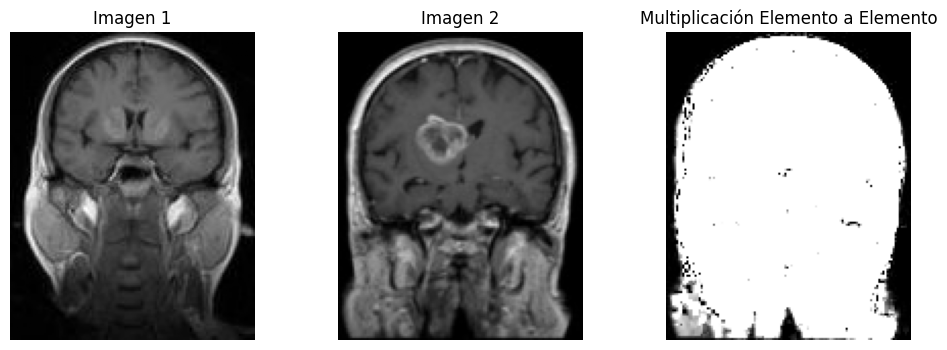

In [ ]:
# Cargar las dos imágenes en escala de grises
img1 = cv2.imread("/content/no tumor.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar para que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(img2, img1)  # OpenCV maneja el rango automáticamente

# Convertir la imagen resultante a uint8
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Elemento a Elemento")
plt.axis("off")

plt.show()


La multiplicación elemento por elemento en imágenes biomédicas permite resaltar regiones específicas, como tumores u órganos, aplicando máscaras. También se usa para combinar imágenes de distintos estudios, corregir defectos ópticos, extraer estructuras anatómicas y visualizar resultados de inteligencia artificial o tratamientos como la radioterapia. Es útil porque modifica intensidades sin alterar la forma de la imagen.










## Parte II- Operaciones lógicas


Operaciones Lógicas AND, OR, NOT y XOR

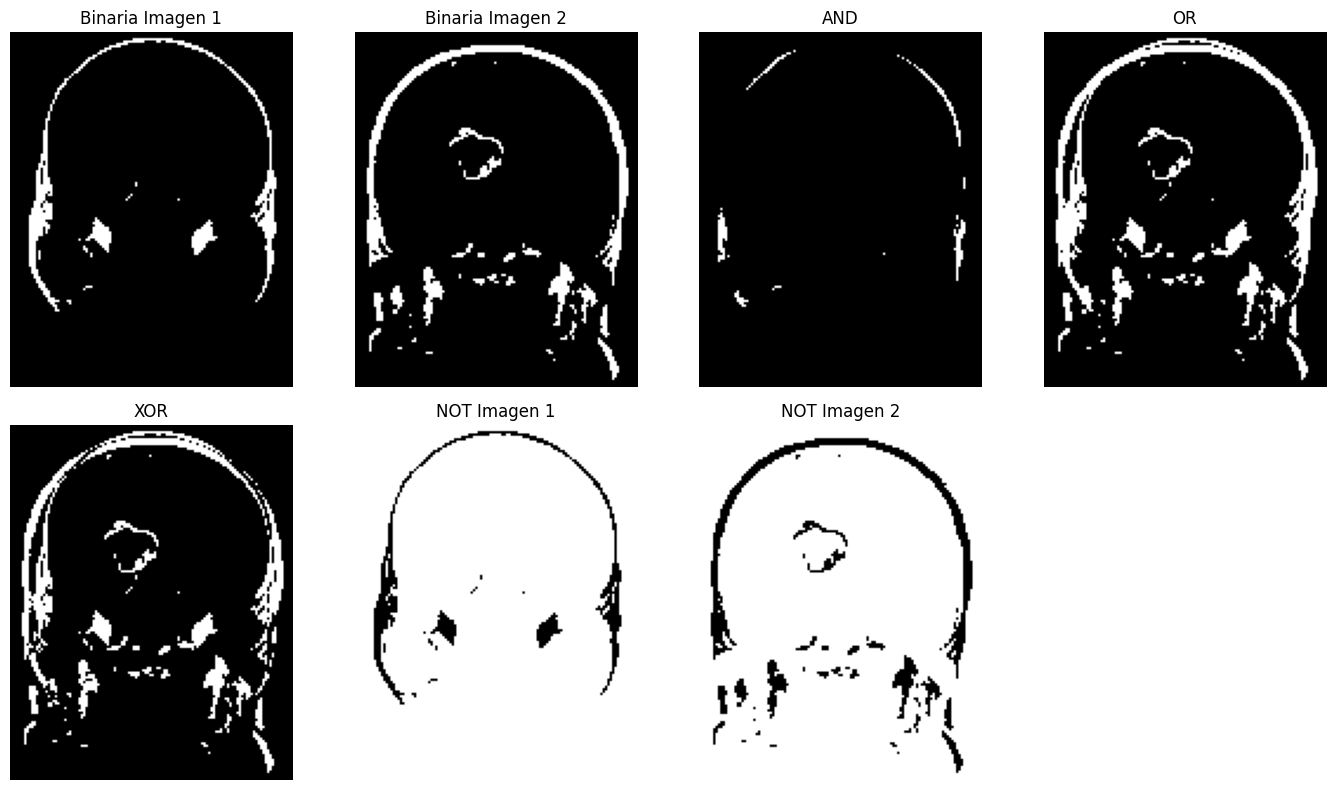

In [ ]:
# Cargar las dos imágenes en escala de grises
img1 = cv2.imread("/content/no tumor.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/tumor.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar img2 al tamaño de img1 si no coinciden
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Aplicar un umbral para convertir a imágenes binarias
_, bin_img1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, bin_img2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

# Aplicar operaciones lógicas: AND, OR, XOR, NOT
and_result = cv2.bitwise_and(bin_img1, bin_img2)
or_result = cv2.bitwise_or(bin_img1, bin_img2)
xor_result = cv2.bitwise_xor(bin_img1, bin_img2)
not_img1 = cv2.bitwise_not(bin_img1)
not_img2 = cv2.bitwise_not(bin_img2)

# Mostrar los resultados
plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.imshow(bin_img1, cmap='gray')
plt.title("Binaria Imagen 1")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(bin_img2, cmap='gray')
plt.title("Binaria Imagen 2")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(and_result, cmap='gray')
plt.title("AND")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(or_result, cmap='gray')
plt.title("OR")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(xor_result, cmap='gray')
plt.title("XOR")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(not_img1, cmap='gray')
plt.title("NOT Imagen 1")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(not_img2, cmap='gray')
plt.title("NOT Imagen 2")
plt.axis("off")

plt.tight_layout()
plt.show()


### Referencias

Instituto de Salud Carlos III. (2024, agosto 20). IMPaCT-Data, integración de datos médicos para impulsar la medicina de precisión. datos.gob.es. https://datos.gob.es/es/blog/impact-data-integracion-de-datos-medicos-para-impulsar-la-medicina-de-precision

Pérez, P. (n.d.). Fundamentos básicos del procesamiento de imágenes. Universidad Nacional de Córdoba. https://www.famaf.unc.edu.ar/~pperez1/manuales/cim/cap2.html

Lebre, R., Silva, L. B., & Costa, C. (2021). Collaborative Visualization and Annotations of DICOM Images for Real-Time Web-based Telemedicine System. IEEE. https://ieeexplore-ieee-org.udlap.idm.oclc.org/stamp/stamp.jsp?tp=&arnumber=9585938

Araque, J. (2023, mayo 31). #3: SQL y Ciencia de Datos en la Atención Médica: De lo Abstracto a lo Real. LinkedIn. https://www.linkedin.com/pulse/3-sql-y-ciencia-de-datos-en-la-atenci%C3%B3n-m%C3%A9dica-lo-abstracto-araque-lzu7f

Hernández Víctor, Y., & Fernández Rigondeaux, Y. (2021). Algoritmos para el procesamiento de imágenes con artefactos de endurecimiento de haz en tomografía computarizada. Revista Cubana de Ciencias Informáticas, 15(2), 96–117. http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S2227-18992021000200096

PostDICOM. (2023). Aprovechar el PACS en la telemedicina. PostDICOM Blog. https://www.postdicom.com/es/blog/leveraging-pacs-in-telemedicine